<a href="https://www.kaggle.com/code/averma111/playground-s3e12-xgboost-lgbm-catboost?scriptVersionId=124995591" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV
from sklearn.metrics import mean_squared_log_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostClassifier, Pool
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML


In [3]:
!wget http://bit.ly/3ZLyF82 -O CSS.css -q
    
from IPython.core.display import HTML
with open('./CSS.css', 'r') as file:
    custom_css = file.read()

HTML(custom_css)

In [12]:
Root_path ='/kaggle/input/playground-series-s3e12'
Root_original ='/kaggle/input/kidney-stone-prediction-based-on-urine-analysis'

original = pd.read_csv(Root_original+'/kindey stone urine analysis.csv')
train = pd.read_csv(Root_path+'/train.csv')
test = pd.read_csv(Root_path+'/test.csv')

In [5]:
train.head(5)

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [6]:
test.head(5)

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36


In [18]:
def summary(text, df):
    print(f'{text} shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summ['null'] = df.isnull().sum()
    summ['unique'] = df.nunique()
    summ['min'] = df.min()
    summ['median'] = df.median()
    summ['max'] = df.max()
    summ['mean'] = df.mean()
    summ['std'] = df.std()
    return summ


In [20]:
summary('test',test)

test shape: (276, 7)


,dtypes,null,unique,min,median,max,mean,std
id,int64,0,276,414.000,551.500,689.000,551.500000,79.818544
gravity,float64,0,27,1.005,1.019,1.034,1.018330,0.006569
ph,float64,0,62,4.900,5.730,7.940,5.939312,0.607143
osmo,int64,0,75,187.000,658.000,1236.000,654.891304,236.361932
cond,float64,0,58,5.100,23.600,38.000,21.886594,7.346069
urea,int64,0,71,64.000,282.000,620.000,280.985507,134.877856
calc,float64,0,74,0.170,3.230,14.340,4.076848,3.088524


In [22]:
df_full = pd.concat([train, original])
for col in original.columns:
    df_full[col] = df_full[col].astype('float64')

In [23]:
summary('full',df_full)

full shape: (493, 8)


,dtypes,null,unique,min,median,max,mean,std
id,float64,79,414,0.000,206.500,413.00,206.500000,119.655756
gravity,float64,0,29,1.005,1.018,1.04,1.017929,0.006761
ph,float64,0,75,4.760,5.770,7.94,5.967160,0.655861
osmo,float64,0,80,187.000,668.000,1236.00,645.344828,235.320087
cond,float64,0,67,5.100,21.900,38.00,21.337931,7.579484
urea,float64,0,74,10.000,272.000,620.00,276.693712,135.568157
calc,float64,0,86,0.170,3.160,14.34,4.118540,3.221149
target,float64,0,2,0.000,0.000,1.00,0.442191,0.497151


In [26]:
print(f' Row => {df_full.shape[0]}, Columns => {df_full.shape[1]}')

 Row => 493, Columns => 8


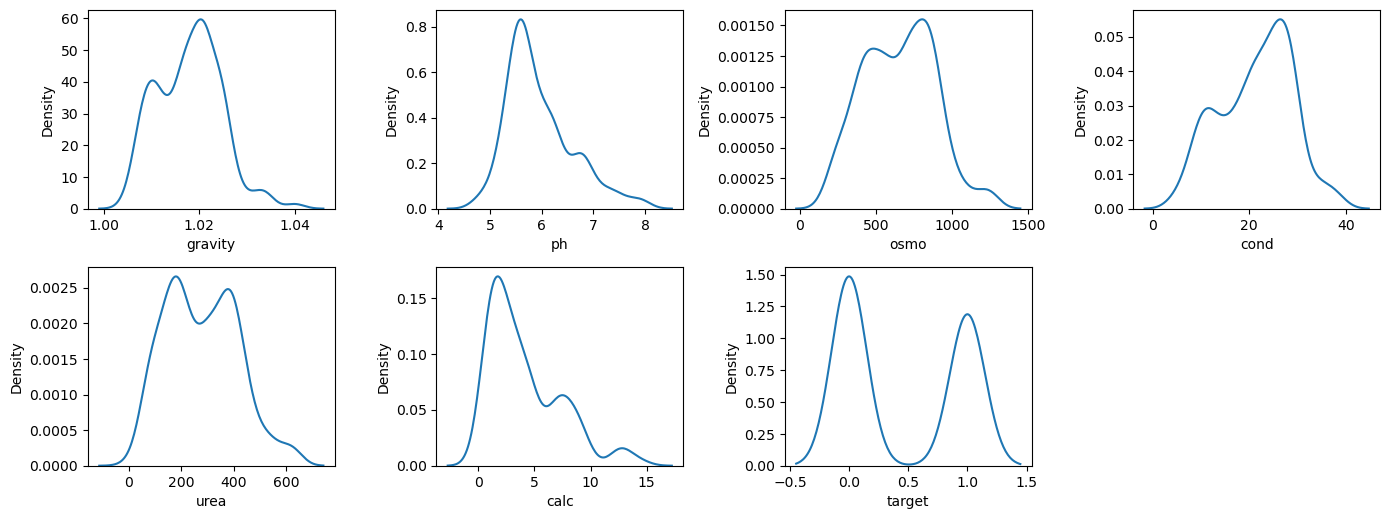

In [28]:
plt.figure(figsize=(14,10))
for i in range(1, len(df_full.columns)):
    plt.subplot(4,4,i)
    sns.kdeplot(x=train[train.columns[i]], label='Full Dataset')
    plt.tight_layout()